In [1]:
import numpy as np
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score, roc_curve

In [91]:
def sklearn_metrics(true, pred):
    acc = accuracy_score(true, pred)
    p = precision_score(true, pred, average='binary')
    r = recall_score(true, pred, average='binary')
    f1 = f1_score(true, pred, average='binary')
    print('acc = {0:1.4f}'.format(acc))
    print('F1 = {0:1.4f}, P = {1:1.4f}, R = {2:1.4f}'.format(f1, p, r))

Функции для подсчета точности, полноты и ф-меры:

In [87]:
def tp_fp_tn_fn(true, pred):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(true)):
        if true[i] == 1 == pred[i]:
            tp += 1
        if true[i] == 1 and  true[i] != pred[i]:
            fn += 1
        if true[i] == 0 == pred[i]:
            tn += 1
        if true[i] == 0 and  true[i] != pred[i]:
            fp += 1
    return(tp, fp, tn, fn)

def accuracy(tp, fp, tn, fn):
    return((tp + tn)/(tp + fp + tn + fn))

def precision(tp, fp, tn, fn):
    return(tp/(tp + fp))

def recall(tp, fp, tn, fn):
    return(tp/(tp + fn))

def f_score(P, R):
    return(2 * P * R/(P + R))

def all_scores(true, pred):
    tp, fp, tn, fn = tp_fp_tn_fn(true, pred)
    P = precision(tp, fp, tn, fn)
    R = recall(tp, fp, tn, fn)
    print('acc = {0:1.4f}'.format(accuracy(tp, fp, tn, fn)))
    print('F1 = {0:1.4f}, P = {1:1.4f}, R = {2:1.4f}'.format(f_score(P, R), P, R))

In [2]:
train = datasets.load_files('aclImdb/train/', categories = ['neg', 'pos'], random_state = 42)
test = datasets.load_files('aclImdb/test/', random_state = 42)

In [26]:
tfidf_vect = TfidfVectorizer(max_features=100000, min_df=5, max_df=0.4, ngram_range=(1,2))
X_train_tfidf = tfidf_vect.fit_transform(train.data)
X_test = tfidf_vect.transform(test.data)

# Decision Tree

In [28]:
clf = DecisionTreeClassifier().fit(X_train_tfidf, train.target)
predicted = clf.predict(X_test)

 Метрики sklearn:

In [94]:
sklearn_metrics(test.target, predicted)

acc = 0.7113
F1 = 0.7100, P = 0.7132, R = 0.7068


Мои метрики:

In [95]:
all_scores(test.target, predicted)

acc = 0.7113
F1 = 0.7100, P = 0.7132, R = 0.7068


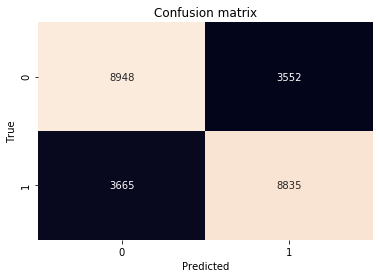

In [109]:
%matplotlib inline

sns.heatmap(data=confusion_matrix(test.target, predicted), annot=True, fmt="d", cbar=False)
plt.title("Confusion matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

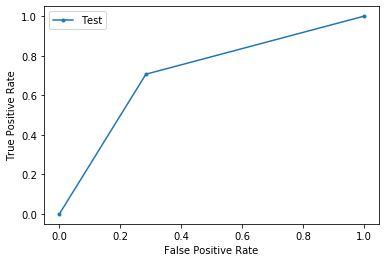

In [98]:
y_true = test.target
y_predicted = predicted
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [99]:
print(roc_auc_score(y_true, y_predicted))

0.7113200000000001


# Логистическая регрессия

In [34]:
clf1 = LogisticRegression().fit(X_train_tfidf, train.target)
predicted1 = clf1.predict(X_test)

c:\users\ольга\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


 Метрики sklearn:

In [100]:
sklearn_metrics(test.target, predicted1)

acc = 0.8964
F1 = 0.8967, P = 0.8937, R = 0.8997


Мои метрики:

In [101]:
all_scores(test.target, predicted1)

acc = 0.8964
F1 = 0.8967, P = 0.8937, R = 0.8997


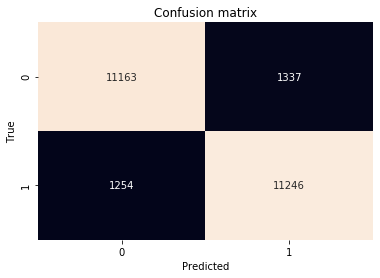

In [107]:
sns.heatmap(data=confusion_matrix(test.target, predicted1), annot=True, fmt="d", cbar=False)
plt.title("Confusion matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

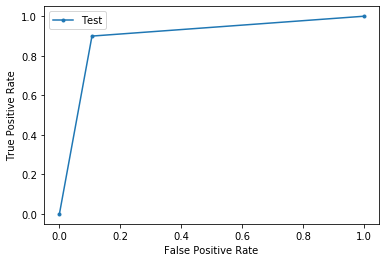

In [103]:
y_true = test.target
y_predicted = predicted1
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [104]:
print(roc_auc_score(y_true, y_predicted))

0.89636


# SVM

In [54]:
clf2 = LinearSVC().fit(X_train_tfidf, train.target, probability = True)
predicted2 = clf2.predict(X_test)

In [105]:
sklearn_metrics(test.target, predicted2)

acc = 0.8997
F1 = 0.8993, P = 0.9027, R = 0.8959


In [106]:
all_scores(test.target, predicted2)

acc = 0.8997
F1 = 0.8993, P = 0.9027, R = 0.8959


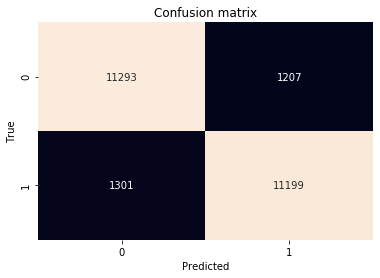

In [108]:
sns.heatmap(data=confusion_matrix(test.target, predicted2), annot=True, fmt="d", cbar=False)
plt.title("Confusion matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

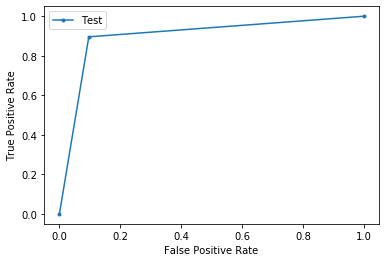

In [111]:
y_true = test.target
y_predicted = predicted2
fpr, tpr, _ = roc_curve(y_true, y_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [112]:
print(roc_auc_score(y_true, y_predicted))

0.8996800000000001


Лучший результат из трех моделей показывает SVM

# Самые негативные и самые позитивные рецензии:

Выберем 15 самых негативных и 15 самых позитивных рецензий по мнению модели LogisticRegression

In [148]:
probs = clf1.predict_proba(X_test)

15 самых негативных рецензий

In [149]:
neg_probs = {i : probs[i][0] for i in range(len(probs))}
most_neg = []
for n in sorted(neg_probs.items() ,  key=lambda x: x[1], reverse=True):
    most_neg.append(n[0])
for i in most_neg[:15]:
    print('{}\n{}\n'.format(i, test.data[i]))

14717
b'As you can tell from the other comments, this movie is just about the WORST film ever made. Let me see how many different words I can use to describe it: Boring, Unbearable, Laughable, Lousy, Stupid, Horrible.....<br /><br />I could go on with such descriptions but you probably get the point.<br /><br />I would have given this a 0, if possible--bad acting, bad directing, bad production, bad plot.<br /><br />This was made in 2001 and it looks more like 1965. Very low budget, boring plot, horrible acting, really bad special effects, etc...<br /><br />I rarely ever see a Sci-Fi film I absolutely think is this bad. I mean this is pure garbage. It has nothing going for it either. As far as a "B-movie" this is the very bottom of the lot.<br /><br />I think I would be more entertained by staring at a blank piece of paper for 90 minutes. Junk like this gives good low-budget "B" movies a bad name. This makes Ed Wood movies look good.<br /><br />The thing about watching direct-to-video m

15 самых позитивных рецензий

In [150]:
pos_probs = {i : probs[i][1] for i in range(len(probs))}
most_pos = []
for n in sorted(pos_probs.items() ,  key=lambda x: x[1], reverse=True):
    most_pos.append(n[0])
for i in most_pos[:15]:
    print('{}\n{}\n'.format(i, test.data[i]))

24154
b"This is one of Bruce's most underrated films in my opinion, its an awesome heartwarming film, with a neat story and an amazing performance from Bruce Willis!. All the characters are great, and I thought Willis and Spencer Breslin were just awesome together, plus Bruce Willis is simply amazing in this!. This is definitely one of Bruce's best comedic performances (The waaaaaaaaaamabulance thing was great) and I thought it was very well written and made as well, plus The finale is especially cool!. It's good natured and it was cool how you can see Russell's (Willis) character change throughout the film! plus the ending was pretty good. I think this should be higher then 6.0 and it's one of the best Disney films I have ever seen! plus it has many surprising moments throughout. All the characters are extremely likable, and it also has a cute love story angle too it as well, plus Bruce and Spencer Breslin both had some really funny lines (Holy Smokes!). This is one of Bruce's most un